# EDSL: Using Wikipedia data to generate AI agents for surveys
This notebook provides example EDSL code for using a model to clean and augment Wikipedia table data to use with survey questions or as traits of AI [agents](https://docs.expectedparrot.com/en/latest/agents.html) to answer surveys. Learn more about many other methods for importing data from other sources (CSV, PDF, images, videos, text, etc.) in our [documentation page](https://docs.expectedparrot.com).

Before running the code below please see instructions on [getting started](https://www.expectedparrot.com/getting-started) using EDSL.

## Importing data from Wikipedia
EDSL provides a convenient method for importing tables from Wikipedia to use as context of survey [questions](https://docs.expectedparrot.com/en/latest/questions.html) or as traits of AI [agents](https://docs.expectedparrot.com/en/latest/agents.html) that you want to use to answer questions.

For example, here we import a table of data about US Presidents from [this page](https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States)--here's a screenshot of the table (learn more about storing and sharing data at Coop with the [FileStore](https://docs.expectedparrot.com/en/latest/filestore.html) module):

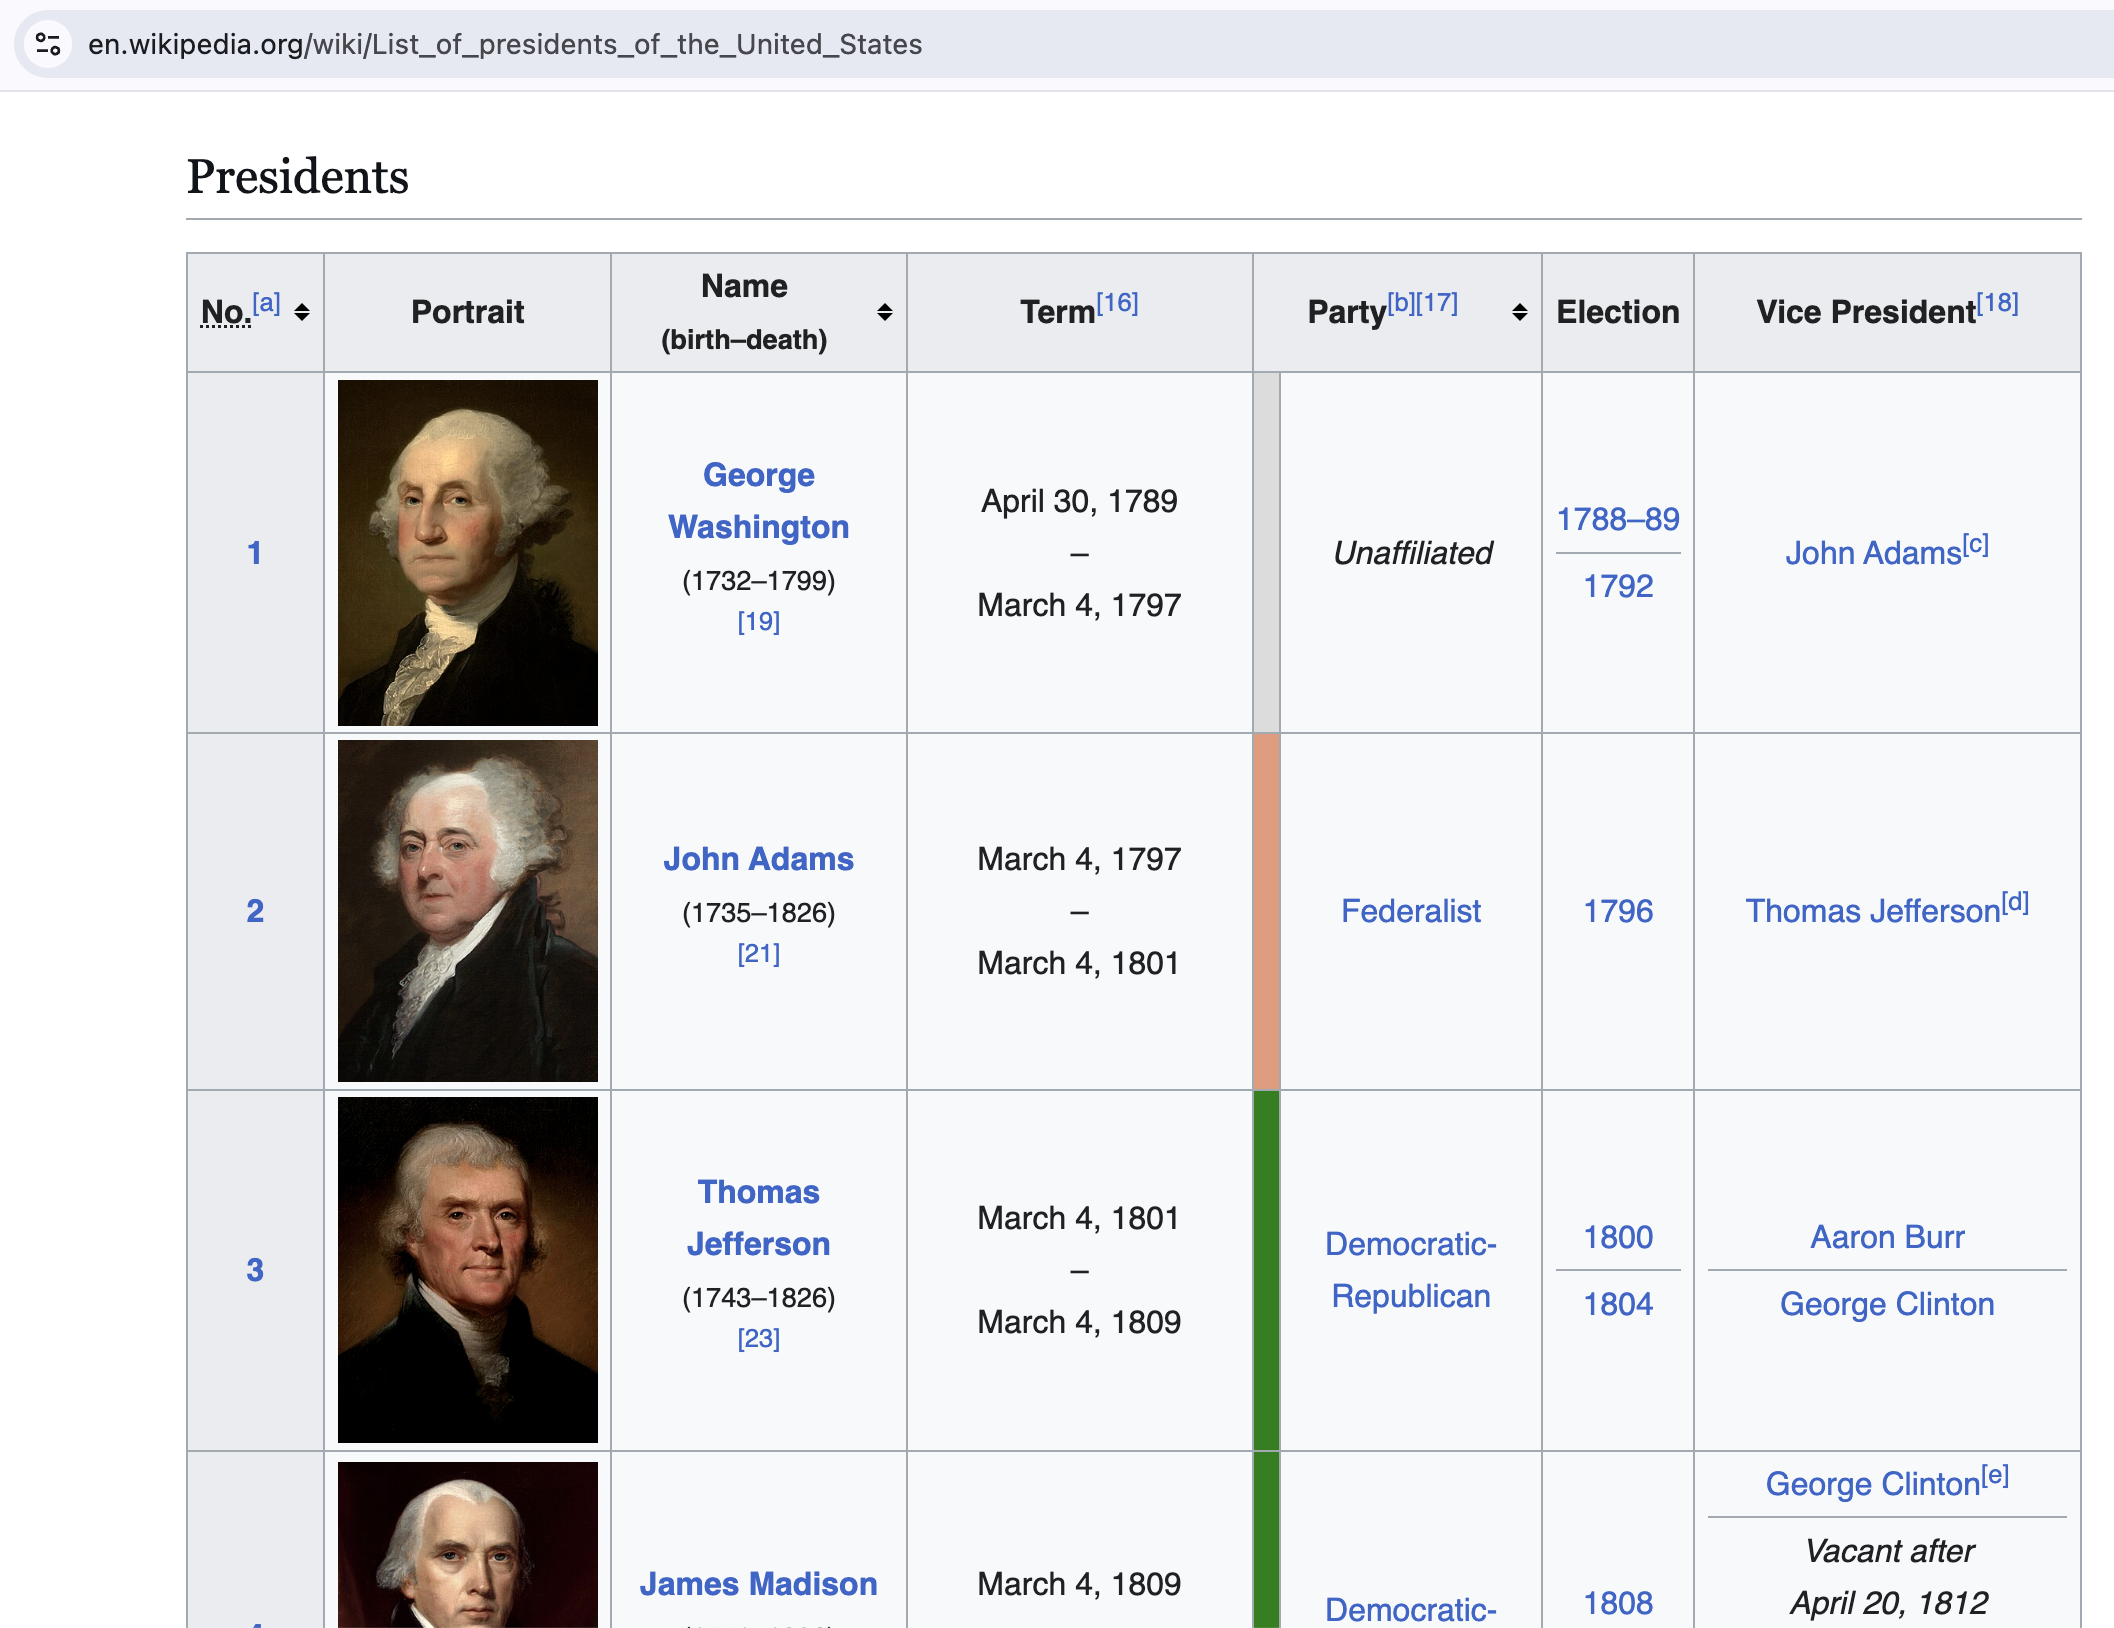

In [1]:
from edsl import FileStore

fs = FileStore.pull("https://www.expectedparrot.com/content/RobinHorton/wikipedia-table-us-presidents-screenshot")
fs.view()

## Creating scenarios of data
We store the table data as a list of [scenarios](https://docs.expectedparrot.com/en/latest/scenarios.html).
This allows us to efficiently add individual components of the entries to questions that we want to repeat for each entry, (or to create an [agent](https://docs.expectedparrot.com/en/latest/agents.html)--more on that later):

In [2]:
from edsl import ScenarioList

sl = ScenarioList.from_source(
    "wikipedia", 
    "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States",
    0 # table number
)
sl

,No.[a],Portrait,Name (birth–death),Term[16],Party[b][17],Party[b][17].1,Election,Vice President[18]
0,1,nan,George Washington (1732–1799) [19],"April 30, 1789 – March 4, 1797",nan,Unaffiliated,1788–891792,John Adams[c]
1,2,nan,John Adams (1735–1826) [21],"March 4, 1797 – March 4, 1801",nan,Federalist,1796,Thomas Jefferson[d]
2,3,nan,Thomas Jefferson (1743–1826) [23],"March 4, 1801 – March 4, 1809",nan,Democratic- Republican,1800 1804,Aaron BurrGeorge Clinton
3,4,nan,James Madison (1751–1836) [24],"March 4, 1809 – March 4, 1817",nan,Democratic- Republican,18081812,"George Clinton[e]Vacant after April 20, 1812Elbridge Gerry[e]Vacant after November 23, 1814"
4,5,nan,James Monroe (1758–1831) [26],"March 4, 1817 – March 4, 1825",nan,Democratic- Republican,18161820,Daniel D. Tompkins
5,6,nan,John Quincy Adams (1767–1848) [27],"March 4, 1825 – March 4, 1829",nan,Democratic- Republican[f]National Republican,1824,John C. Calhoun[g]
6,7,nan,Andrew Jackson (1767–1845) [30],"March 4, 1829 – March 4, 1837",nan,Democratic,18281832,"John C. Calhoun[h]Vacant after December 28, 1832Martin Van Buren"
7,8,nan,Martin Van Buren (1782–1862) [31],"March 4, 1837 – March 4, 1841",nan,Democratic,1836,Richard Mentor Johnson
8,9,nan,William Henry Harrison (1773–1841) [32],"March 4, 1841 – April 4, 1841[e]",nan,Whig,1840,John Tyler
9,10,nan,John Tyler (1790–1862) [33],"April 4, 1841[i] – March 4, 1845",nan,Whig[j]Unaffiliated,–,Vacant throughout presidency


We can rename columns for convenience:

In [3]:
sl = sl.rename({
    'No.[a]':"number", 
    'Election':"election", 
    'Name (birth–death)':"name_birth_death", 
    'Party[b][17]':"party", 
    'Portrait':"portrait", 
    'Party[b][17].1':"party", 
    'Term[16]':"term", 
    'Vice President[18]':"vice_president"
})

We can select and drop columns as needed:

In [4]:
sl = sl.select("name_birth_death", "number", "term", "party", "vice_president")
sl

,name_birth_death,number,term,party,vice_president
0,George Washington (1732–1799) [19],1,"April 30, 1789 – March 4, 1797",Unaffiliated,John Adams[c]
1,John Adams (1735–1826) [21],2,"March 4, 1797 – March 4, 1801",Federalist,Thomas Jefferson[d]
2,Thomas Jefferson (1743–1826) [23],3,"March 4, 1801 – March 4, 1809",Democratic- Republican,Aaron BurrGeorge Clinton
3,James Madison (1751–1836) [24],4,"March 4, 1809 – March 4, 1817",Democratic- Republican,"George Clinton[e]Vacant after April 20, 1812Elbridge Gerry[e]Vacant after November 23, 1814"
4,James Monroe (1758–1831) [26],5,"March 4, 1817 – March 4, 1825",Democratic- Republican,Daniel D. Tompkins
5,John Quincy Adams (1767–1848) [27],6,"March 4, 1825 – March 4, 1829",Democratic- Republican[f]National Republican,John C. Calhoun[g]
6,Andrew Jackson (1767–1845) [30],7,"March 4, 1829 – March 4, 1837",Democratic,"John C. Calhoun[h]Vacant after December 28, 1832Martin Van Buren"
7,Martin Van Buren (1782–1862) [31],8,"March 4, 1837 – March 4, 1841",Democratic,Richard Mentor Johnson
8,William Henry Harrison (1773–1841) [32],9,"March 4, 1841 – April 4, 1841[e]",Whig,John Tyler
9,John Tyler (1790–1862) [33],10,"April 4, 1841[i] – March 4, 1845",Whig[j]Unaffiliated,Vacant throughout presidency


## Using a model for data cleaning and augmentation
EDSL allows us to use questions and answers to clean up a dataset, and augment it.
Rather than fuss with regular expressions, we can prompt a model to reformat or extract information from scenarios and have them automatically formatted as augmented datasets.
We can also use a model to answer questions about the data and have the answers as new columns of the dataset.

For example, here we want to store name, birth and death years as separate columns.
We also want to standardize the formatting of the VPs, and say we also want to add a column for each President's birth city and state.
EDSL comes with many [question types](https://docs.expectedparrot.com/en/latest/questions.html) that we can choose from based on the desired format of the answer.
We combine multiple questions in a [survey](https://docs.expectedparrot.com/en/latest/surveys.html) in order to administer them at once:

In [5]:
from edsl import QuestionDict, QuestionList, Survey

q1 = QuestionDict(
    question_name = "reformat_name",
    question_text = """Please reformat the following text: '{{ scenario.name_birth_death }}'
    If the person is still alive, use 'Living' for the 'death' value.
    Ignore any footnote references.""",
    answer_keys = ["name", "birth", "death"],
    value_types = [str, str, str]
)

q2 = QuestionList(
    question_name = "vp_list",
    question_text = """Please reformat the following text as a list of names where 
    each complete name is a single string in the list: {{ scenario.vice_president }}. 
    Ignore any other text."""
)

q3 = QuestionDict(
    question_name = "birthplace",
    question_text = """Identify the city and state where this US President was born:
    {{ scenario.name_birth_death }}""",
    answer_keys = ["city", "state"],
    value_types = [str, str],
    value_descriptions = [
        "Name of the city (use 'Unknown' if not known)", 
        "State abbreviation (e.g., 'MA')"
    ]
)

survey = Survey(questions = [q1, q2, q3])

results = survey.by(sl).run()

We can view the Results at Coop (see link above) and inspect any columns of the results that have been generated:

In [6]:
results.columns

,0
0,agent.agent_index
1,agent.agent_instruction
2,agent.agent_name
3,answer.birthplace
4,answer.reformat_name
5,answer.vp_list
6,cache_keys.birthplace_cache_key
7,cache_keys.reformat_name_cache_key
8,cache_keys.vp_list_cache_key
9,cache_used.birthplace_cache_used


In [7]:
results.select("reformat_name", "vp_list", "birthplace")

,answer.reformat_name,answer.vp_list,answer.birthplace
0,"{'name': 'George Washington', 'birth': '1732', 'death': '1799'}",['John Adams'],"{'city': 'Unknown', 'state': 'VA'}"
1,"{'name': 'John Adams', 'birth': '1735', 'death': '1826'}",['Thomas Jefferson'],"{'city': 'Braintree', 'state': 'MA'}"
2,"{'name': 'Thomas Jefferson', 'birth': '1743', 'death': '1826'}","['Aaron Burr', 'George Clinton']","{'city': 'Shadwell', 'state': 'VA'}"
3,"{'name': 'James Madison', 'birth': '1751', 'death': '1836'}","['George Clinton', 'Elbridge Gerry']","{'city': 'Port Conway', 'state': 'VA'}"
4,"{'name': 'James Monroe', 'birth': '1758', 'death': '1831'}",['Daniel D. Tompkins'],"{'city': 'Unknown', 'state': 'VA'}"
5,"{'name': 'John Quincy Adams', 'birth': '1767', 'death': '1848'}",['John C. Calhoun'],"{'city': 'Braintree', 'state': 'MA'}"
6,"{'name': 'Andrew Jackson', 'birth': '1767', 'death': '1845'}","['John C. Calhoun', 'Martin Van Buren']","{'city': 'Unknown', 'state': 'NC'}"
7,"{'name': 'Martin Van Buren', 'birth': '1782', 'death': '1862'}",['Richard Mentor Johnson'],"{'city': 'Kinderhook', 'state': 'NY'}"
8,"{'name': 'William Henry Harrison', 'birth': '1773', 'death': '1841'}",['John Tyler'],"{'city': 'Charles City County', 'state': 'VA'}"
9,"{'name': 'John Tyler', 'birth': '1790', 'death': '1862'}",[],"{'city': 'Charles City County', 'state': 'VA'}"


Here we flatten, rename and store the columns that we want as a new scenario list:

In [8]:
results.select("reformat_name", "number", "term", "party", "vp_list", "birthplace")

,answer.reformat_name,scenario.number,scenario.term,scenario.party,answer.vp_list,answer.birthplace
0,"{'name': 'George Washington', 'birth': '1732', 'death': '1799'}",1,"April 30, 1789 – March 4, 1797",Unaffiliated,['John Adams'],"{'city': 'Unknown', 'state': 'VA'}"
1,"{'name': 'John Adams', 'birth': '1735', 'death': '1826'}",2,"March 4, 1797 – March 4, 1801",Federalist,['Thomas Jefferson'],"{'city': 'Braintree', 'state': 'MA'}"
2,"{'name': 'Thomas Jefferson', 'birth': '1743', 'death': '1826'}",3,"March 4, 1801 – March 4, 1809",Democratic- Republican,"['Aaron Burr', 'George Clinton']","{'city': 'Shadwell', 'state': 'VA'}"
3,"{'name': 'James Madison', 'birth': '1751', 'death': '1836'}",4,"March 4, 1809 – March 4, 1817",Democratic- Republican,"['George Clinton', 'Elbridge Gerry']","{'city': 'Port Conway', 'state': 'VA'}"
4,"{'name': 'James Monroe', 'birth': '1758', 'death': '1831'}",5,"March 4, 1817 – March 4, 1825",Democratic- Republican,['Daniel D. Tompkins'],"{'city': 'Unknown', 'state': 'VA'}"
5,"{'name': 'John Quincy Adams', 'birth': '1767', 'death': '1848'}",6,"March 4, 1825 – March 4, 1829",Democratic- Republican[f]National Republican,['John C. Calhoun'],"{'city': 'Braintree', 'state': 'MA'}"
6,"{'name': 'Andrew Jackson', 'birth': '1767', 'death': '1845'}",7,"March 4, 1829 – March 4, 1837",Democratic,"['John C. Calhoun', 'Martin Van Buren']","{'city': 'Unknown', 'state': 'NC'}"
7,"{'name': 'Martin Van Buren', 'birth': '1782', 'death': '1862'}",8,"March 4, 1837 – March 4, 1841",Democratic,['Richard Mentor Johnson'],"{'city': 'Kinderhook', 'state': 'NY'}"
8,"{'name': 'William Henry Harrison', 'birth': '1773', 'death': '1841'}",9,"March 4, 1841 – April 4, 1841[e]",Whig,['John Tyler'],"{'city': 'Charles City County', 'state': 'VA'}"
9,"{'name': 'John Tyler', 'birth': '1790', 'death': '1862'}",10,"April 4, 1841[i] – March 4, 1845",Whig[j]Unaffiliated,[],"{'city': 'Charles City County', 'state': 'VA'}"


In [9]:
sl_new = (
    results
        .select("reformat_name", "number", "term", "party", "vp_list", "birthplace")
        .flatten("answer.reformat_name")
        .flatten("answer.birthplace")
        .rename({
            "answer.reformat_name.name":"name",
            "scenario.number":"number",
            "scenario.term":"term",
            "scenario.party":"party",
            "answer.vp_list":"vice_presidents",
            "answer.reformat_name.birth":"birth",
            "answer.reformat_name.death":"death",
            "answer.birthplace.city":"birth_city",
            "answer.birthplace.state":"birth_state"
        })
        .select("name", "number", "term", "party", "vice_presidents", "birth_city", "birth_state")
        .to_scenario_list()
)
sl_new

,number,term,party,vice_presidents,name,birth_city,birth_state
0,1,"April 30, 1789 – March 4, 1797",Unaffiliated,['John Adams'],George Washington,Unknown,VA
1,2,"March 4, 1797 – March 4, 1801",Federalist,['Thomas Jefferson'],John Adams,Braintree,MA
2,3,"March 4, 1801 – March 4, 1809",Democratic- Republican,"['Aaron Burr', 'George Clinton']",Thomas Jefferson,Shadwell,VA
3,4,"March 4, 1809 – March 4, 1817",Democratic- Republican,"['George Clinton', 'Elbridge Gerry']",James Madison,Port Conway,VA
4,5,"March 4, 1817 – March 4, 1825",Democratic- Republican,['Daniel D. Tompkins'],James Monroe,Unknown,VA
5,6,"March 4, 1825 – March 4, 1829",Democratic- Republican[f]National Republican,['John C. Calhoun'],John Quincy Adams,Braintree,MA
6,7,"March 4, 1829 – March 4, 1837",Democratic,"['John C. Calhoun', 'Martin Van Buren']",Andrew Jackson,Unknown,NC
7,8,"March 4, 1837 – March 4, 1841",Democratic,['Richard Mentor Johnson'],Martin Van Buren,Kinderhook,NY
8,9,"March 4, 1841 – April 4, 1841[e]",Whig,['John Tyler'],William Henry Harrison,Charles City County,VA
9,10,"April 4, 1841[i] – March 4, 1845",Whig[j]Unaffiliated,[],John Tyler,Charles City County,VA


## Generating agents
We can also use the scenarios to generate AI [agents](https://docs.expectedparrot.com/agents.html) with traits for the values. For example, here we have the Presidents answer some questions:

In [10]:
agents = sl_new.to_agent_list()

In [11]:
agents[0]

,key,value
0,traits:number,1
1,traits:term,"April 30, 1789 – March 4, 1797"
2,traits:party,Unaffiliated
3,traits:vice_presidents,['John Adams']
4,traits:birth_city,Unknown
5,traits:birth_state,VA
6,traits:agent_name,George Washington
7,name,George Washington


In [12]:
from edsl import QuestionFreeText, QuestionLinearScale, Survey

q1 = QuestionFreeText(
    question_name = "highlights",
    question_text = "In your own words, please give me a brief overview of the highlights of your term in office."
)

q2 = QuestionLinearScale(
    question_name = "vp_review",
    question_text = """On a scale from 1 to 10, what did you think of the performance of your Vice President?
    Be brutally honest.""",
    question_options = [1,2,3,4,5,6,7,8,9,10],
    option_labels = {1:"Very poor", 10:"Exceptional"}
)

survey = Survey(questions = [q1, q2])

results = survey.by(agents).run()

A "comment" field is automatically added to all questions (other than free text; learn more about [modifying default prompts](https://docs.expectedparrot.com/en/latest/prompts.html)):

In [13]:
results.select("agent_name", "highlights", "vp_review", "vp_review_comment")

,agent.agent_name,answer.highlights,answer.vp_review,comment.vp_review_comment
0,George Washington,"During my time in office, I focused on establishing a strong foundation for the new nation. One of the major highlights was signing the Judiciary Act of 1789, which established the federal judiciary system. I also emphasized the importance of neutrality in foreign affairs, which was a cornerstone of my foreign policy, as seen in the Proclamation of Neutrality in 1793. Domestically, I dealt with the Whiskey Rebellion, which tested the new government's ability to enforce federal laws. I also supported the creation of a national bank to stabilize and improve the nation's financial system. Throughout my presidency, I aimed to set precedents for future leaders and foster unity among the states.",8,"John Adams was a dedicated and capable Vice President, providing valuable support and counsel during my presidency. He was a man of principle and played a significant role in shaping the early government of our nation."
1,John Adams,"During my term as the second President of the United States, I faced numerous challenges, particularly in foreign affairs. One of the most significant events was the Quasi-War with France, an undeclared naval conflict. To address this, I prioritized strengthening the U.S. Navy and sought to resolve tensions diplomatically, which eventually led to the Convention of 1800, normalizing relations with France. Domestically, my presidency was marked by political tensions, notably between the Federalists and the Democratic-Republicans. The Alien and Sedition Acts, which were passed during my administration, stirred considerable controversy and were seen as an infringement on civil liberties by many of my opponents. Despite these challenges, I remained committed to maintaining peace and upholding the rule of law, even at the cost of my political popularity.",5,"Thomas Jefferson, my Vice President, was a man of significant intellect and principle, but we had starkly different political philosophies and often disagreed on key issues, which made collaboration challenging."
2,Thomas Jefferson,"During my presidency, one of the most significant accomplishments was the Louisiana Purchase in 1803, which effectively doubled the size of the United States and opened up vast territories for exploration and settlement. This was followed by the Lewis and Clark Expedition, which I commissioned to explore and map the newly acquired lands. Another key aspect of my presidency was my focus on reducing the national debt and limiting the size and power of the federal government, in line with my Democratic-Republican principles. I worked to decrease military expenditures and eliminate certain taxes, such as the whiskey tax, which had been unpopular. I also faced challenges, such as tensions with Britain and France, which led to the Embargo Act of 1807. This act aimed to protect American interests by prohibiting trade with these nations, but it unfortunately had severe economic consequences for American merchants and was later repealed. Throughout my terms, I emphasized the importance of education and the separation of church and state, advocating for religious freedom and the rights of individuals. These highlights reflect my efforts to shape a nation rooted in republican values and expansion.",6,"Aaron Burr was effective in some areas, but his ambition and the infamous duel with Alexander Hamilton overshadowed his tenure. George Clinton was more consistent, though not particularly remarkable."
3,James Madison,"During my presidency, one of the most significant events was the War of 1812, which was primarily caused by ongoing tensions with Britain, including issues of trade restrictions and the impressment of American sailors. Although the war was challenging, it ultimately fostered a sense of national unity and identity. Another highlight was the signing of the Treaty of Ghent in 1814, which effectively ended the War of 1812 and restored re

## Posting to Coop
Results above were automatically posted to [Coop](https://docs.expectedparrot.com/en/latest/coop.html).
We can also push any other object type to Coop with the `push` method (and retrieve it with the `pull` method).

Here we publicly post the scenarios, the agents and this [notebook](https://docs.expectedparrot.com/en/latest/notebooks.html) so anyone can view and resuse them.

In [14]:
sl_new.push(
    description = "US Presidents",
    alias = "us-presidents-scenarios",
    visibility = "public"
)

,key,value
0,description,US Presidents
1,object_type,scenario_list
2,url,https://www.expectedparrot.com/content/d223935b-de6d-40fe-9eb3-f97830171a85
3,alias_url,https://www.expectedparrot.com/content/RobinHorton/us-presidents-scenarios
4,uuid,d223935b-de6d-40fe-9eb3-f97830171a85
5,version,1.0.3.dev1
6,visibility,public


In [15]:
agents.push(
    description = "US Presidents",
    alias = "us-presidents-agents",
    visibility = "public"
)

,key,value
0,description,US Presidents
1,object_type,agent_list
2,url,https://www.expectedparrot.com/content/575840a0-0052-4b87-b8c2-4440fd87777e
3,alias_url,https://www.expectedparrot.com/content/RobinHorton/us-presidents-agents
4,uuid,575840a0-0052-4b87-b8c2-4440fd87777e
5,version,1.0.3.dev1
6,visibility,public


In [16]:
from edsl import Notebook

nb = Notebook("us_presidents_example.ipynb")

nb.push(
    description = "Creating scenarios for US Presidents",
    alias = "us-presidents-notebook",
    visibility = "public"
)

,key,value
0,description,Creating scenarios for US Presidents
1,object_type,notebook
2,url,https://www.expectedparrot.com/content/d6897b9d-8df7-4cec-8f68-5245eee3454c
3,alias_url,https://www.expectedparrot.com/content/RobinHorton/us-presidents-notebook
4,uuid,d6897b9d-8df7-4cec-8f68-5245eee3454c
5,version,1.0.3.dev1
6,visibility,public
